# Rapport projet Pubcrypt: gestion et génération d'une paire de clé RSA  

Abstract Ce rapport vise à résumer le travail effectué durant la conception de Pubcrypt. Il retrace chaque étapes, donne une explication précise ainsi que les documentations liés à la tâche réalisée.
Il s'agit aussi d'un tutoriel pour apprendre à implémenter des algorithmes cryptographiques et apprendre à manipuler la librairie.

# Sommaire
[Table of contents]

## Les objectifs de Pubcrypt

RSA est une méthode de chiffrement à clé publique, l'implémenter consiste à fournir les algorithmes suivants:
- un générateur de paires de clés RSA (clé publique et clé privé)
- une primitive de chiffrement et de déchiffrement

Pour l'instant, cette implémentation est très, nous verrons par la suite comment et pourquoi nous devons l'améliorer. Mais chaque chose en son temps. 

## RSA: un cryptosystème délicat à implémenter

Avant de commencer ce projet, je faisais des challenges sur la plateforme cryptohack[1] qui permet d'apprendre ou de mettre en application ses connaissances en cryptographie. Ces challenges énumèrent de nombreuses situations où RSA est compromis à cause de conditions non respectées.
En effet, RSA est délicat à implémenter car depuis sa création, de nombreuses attaques de cryptanalyse ont montré que s'écarter des normes est très une mauvaise idée car la sécurité que procure une paire de clé RSA est alors brisée.

Il faut donc s'armer correctement avec les normes nécessaires pour éviter les erreurs. Pour cela je vous propose ces deux documents provenant du NIST très pratiques: FIPS 186-4[2] et sp800-56[3]. Le NIST est un institut américain de normalisation qui a normalisé de nombreux algorithmes comme RSA, AES et autre. 
Pour Pubcrypt je m'en suis inspiré comme base car la documentation est plutôt explicite et complète.
Voyons à quoi ressemble ces normes.

## Les normes RSA selon la publication sp800-56 du NIST

Sur les deux documents que je vous ai fournis ci-dessus, c'est avec le sp800-56 dont nous auront besoin en premier. Ce document nous explique comment gérer notre paire de clé et comment la générer dans la section 6: RSA keys pairs. Dans la section 6, nous avons besoin des sous-parties 6.2 et 6.3, les autres sous-parties sont des normes qui s'aplliquent à une gestion plus large de notre paire de clé (ex: certificat, droit d'accès etc).




## Création des algorithmes arithmétiques

Dans cette partie nous implémentons les algo arithmétiques nécessaires. En voici la liste:
- pgcd
- racine carré (sqrt)
- exponentiation modulaire (pow_fast)
- inverse modulaire (invmod)
- conversion d'entiers en chaîne de caractère
- conversion de chaîne de caractère en entiers
- conversion d'entier en nombre binaire

Pour réaliser apprendre les concepts de ces algo, je me suis aidé des livres suivants: ...
Quant à ce livre, il m'a alors permis de les améliorer grâce à des méthodes de calculs plus efficaces:

### pgcd

Voici le pseudo-code de l'algorithme:
```

```

En premier lieu, j'ai développé cet algorithme. Il est simple, tiens en quelques lignes, c'est la solution que l'on retrouve le plus souvente an algorithmie.
```py
def GCD(x,y):
    x = abs(x) ; y = abs(y)
    while x > 0:
        x, y = y % x, x
    return y
```

Sauf que nous, on cherche de la performance, j'ai donc fait plus de recherches et j'ai opté pour ce gcd binaire cette fois ci.
```py
def gcd(x, y):
    if x == 0:
        return y
    if y == 0:
        return x

    x_rightmost = x & -x
    y_rightmost = y & -y

    while x_rightmost != y_rightmost:
        if x_rightmost > y_rightmost:
            x_rightmost >>= 1
        else:
            y_rightmost >>= 1

    return x_rightmost
```

Plus long au premier abord mais plus efficace. La preuve, voici la comparaison de cette fonction face au PGCD natif en python. Chaque fonction est exécute 5000 fois avec des valeurs grandes (2**2048).

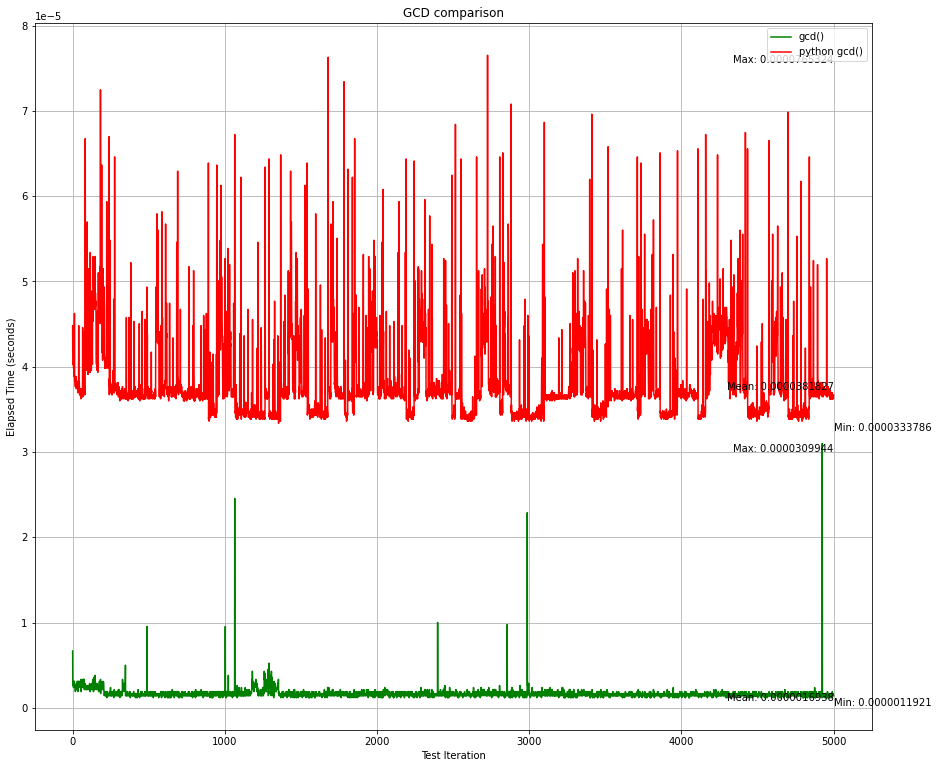

In [2]:
from benchmark.plotting import *
from pubcrypt.number.util import *
import math, random

n = 5000
obj = GraphVisualization("GCD comparison")
obj.measure_execution_time(n, gcd, random.randint(2**2048, 2**2049), random.randint(2**2048, 2**2049))
obj.measure_execution_time(n, math.gcd, random.randint(2**2048, 2**2049), random.randint(2**2048, 2**2049))
obj.plot_data(["green", "red"], ["gcd()", "python gcd()"], show_stats=True)

# References

[1] [Digital Signature Standard (DSS) - FIPS 186-4](https://nvlpubs.nist.gov/nistpubs/fips/nist.fips.186-4.pdf) <br/>
[2] [Recommendation for Pair-Wise Key Establishment Using Integer Factorization Cryptography](https://nvlpubs.nist.gov/nistpubs/SpecialPublications/NIST.SP.800-56Br2.pdf)<br/>
[3] [PKCS #1 Version 2.2: RSA Cryptography Specifications draft-moriarty-pkcs1-01](https://datatracker.ietf.org/doc/pdf/draft-moriarty-pkcs1-01.pdf)<br/>
[4] [Finding Large Primes for Public Key Cryptography - Glenn Henshaw](https://ghenshaw-work.medium.com/finding-large-primes-for-public-key-cryptography-9c5a5c0d32c4)<br/>
[5] [Mathematics of Public Key Cryptography - Steven D Galbraith](https://www.math.auckland.ac.nz/~sgal018/crypto-book/main.pdf)<br/>
[6] An Introduction to Mathematical Cryptography - Jeffrey Hoffstein, Jill Pipher, Joseph H. Silverman<br/>
[7] FAST GENERATION OF RANDOM, STRONG RSA PRIMES - Robert D. Silverman - RSA Laboratories - May 17, 1997<br/>
[8] Cryptosystème RSA - Anca Nitulescu - Ecole Normale Supérieure, Paris<br/>
-  [A Warm Welcome to ASN.1 and DER - Let's Encrypt](https://letsencrypt.org/fr/docs/a-warm-welcome-to-asn1-and-der/)<br/>
- [Algorithms for Modern Hardware - Sergey Slotin](https://en.algorithmica.org/hpc/)<br/>